In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [174]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    xy_responses = []
    w, h = harris_resp.shape[:2]
    for x in range(1, w-1):
        for y in range(1, h-1):
            xy_response = harris_resp[y, x]
            if xy_response >= thr:
                harris_neighborhood = [harris_resp[y, x - 1], harris_resp[y, x + 1], 
                                    # harris_resp[y - 1, x - 1], harris_resp[y - 1, x + 1],
                                    # harris_resp[y + 1, x - 1], harris_resp[y + 1, x + 1],
                                harris_resp[y - 1, x], harris_resp[y + 1, x], xy_response]
                # argmax = np.argmax([i for i in harris_neighborhood])
                argmax = np.argmax(harris_neighborhood)
                if argmax == len(harris_neighborhood) - 1:
                    cornersx.append(x)
                    cornersy.append(y)
                    xy_responses.append(xy_response)

    return cornersy, cornersx, xy_responses

In [58]:
for i in range(1, 5-1):
    for j in range(1, 5-1):
        print(f"(i,j) = ({i},{j})")

(i,j) = (1,1)
(i,j) = (1,2)
(i,j) = (1,3)
(i,j) = (2,1)
(i,j) = (2,2)
(i,j) = (2,3)
(i,j) = (3,1)
(i,j) = (3,2)
(i,j) = (3,3)


In [175]:
def plot(img1, img2, img3, t1, t2, t3):
    plt.close("all")
    plt.ion()
    f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
    ax_arr[0].set_title(t1)
    ax_arr[1].set_title(t2)
    ax_arr[2].set_title(t3)
    ax_arr[0].imshow(img1, cmap='gray')
    ax_arr[1].imshow(img2, cmap='gray')
    ax_arr[2].imshow(img3, cmap='gray')

Implement the main part of the exercise

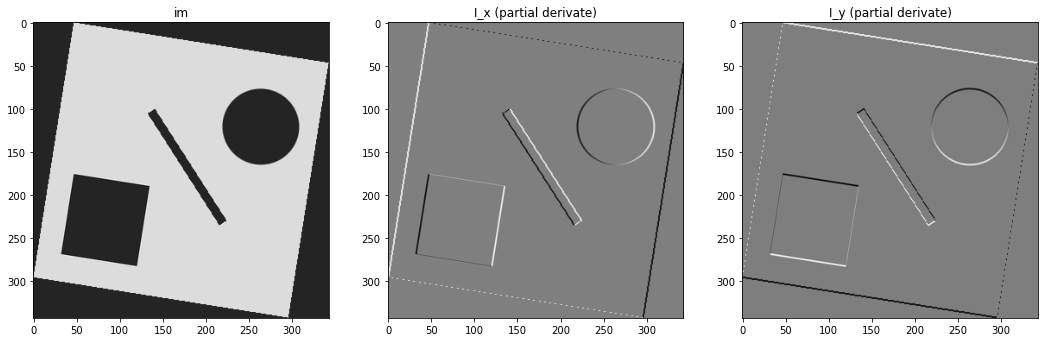

In [216]:
# Define parameters
sigma_w = 2.0
sigma_d = 0.5
kappa = 0.08
rot_angle = 81
thresh = 1000000  #8000

# Read the image
path = 'C:\\Users\\lukaszbinden\\git\\ethz-iacv-2020\\exercise_1\\'
im = cv2.imread(path + 'CircleLineRect.png', 0)
# im = cv2.imread(path + 'chessboard.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter

# 1) employing a two-dimensional isotropic Gaussian filter G_sigma_d and convolving its 
#    closed-form partial derivatives with I
I_x = gaussian_filter1d(im, axis=1, sigma=sigma_d, order=1)
I_y = gaussian_filter1d(im, axis=0, sigma=sigma_d, order=1)

plot(im, I_x, I_y, "im", "I_x (partial derivate)", "I_y (partial derivate)")


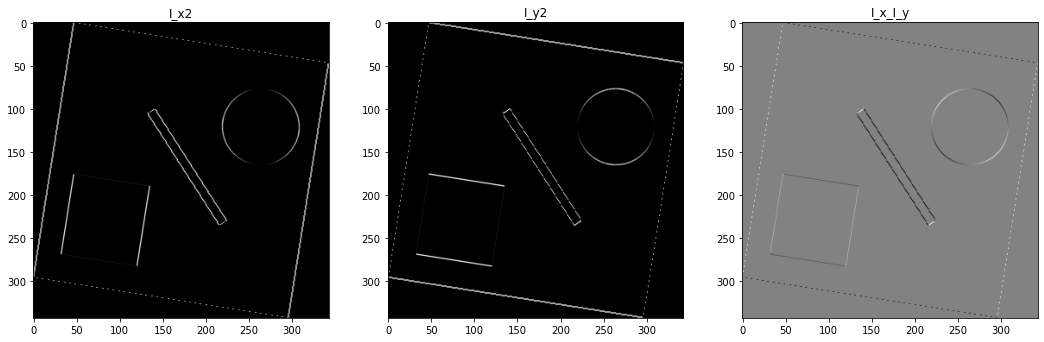

In [217]:
# 2) the second-order moments of partial intensity derivatives are computed, i.e., Ix^2, Iy^2, and Ix  Iy
I_x2 = I_x * I_x
I_y2 = I_y * I_y
I_x_I_y = I_x * I_y

plot(I_x2, I_y2, I_x_I_y, "I_x2", "I_y2", "I_x_I_y")

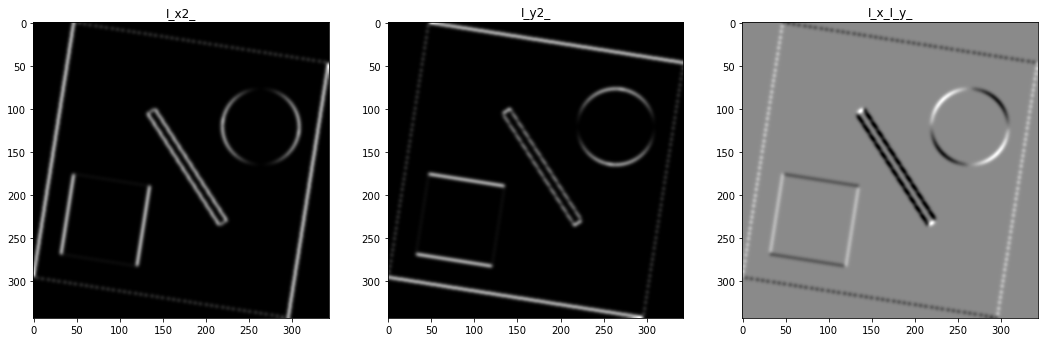

In [218]:
# 3) each of these second-order moments is smoothed isotropically with another two-dimensional Gaussian 
#    filter G_sigma_w, where in principle sigma_w > sigma_d.
I_x2_ = gaussian_filter(I_x2, sigma=sigma_w)
I_y2_ = gaussian_filter(I_y2, sigma=sigma_w)
I_x_I_y_ = gaussian_filter(I_x_I_y, sigma=sigma_w)

plot(I_x2_, I_y2_, I_x_I_y_, "I_x2_", "I_y2_", "I_x_I_y_")

In [219]:
# 4) the calculation of the Harris response H = det(A) - k(trace(A))2, where k is a positive constant
H = I_x2_ * I_y2_ - I_x_I_y * I_x_I_y  - kappa * (I_x2_ + I_y2_)**2

# 5) In order to determine the corner locations in I as a set of isolated pixels, the fifth 
#    and final step is to apply non-maximum suppression to H
corn = nonmax_suppression(H, thresh, 2)

Visualization of the results

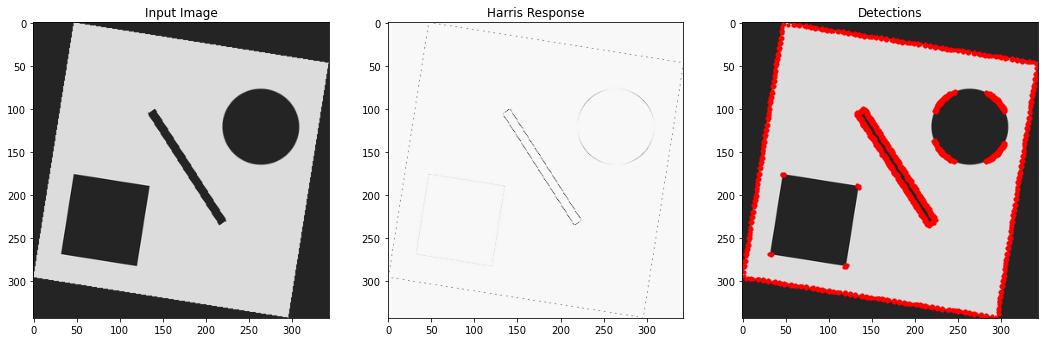

In [220]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)

In [163]:
H[50:]

array([[-1.55456782e-02, -1.99594882e-02, -2.71816093e-02, ...,
        -2.71816093e-02, -1.99594882e-02, -1.55456782e-02],
       [ 4.37650088e-01,  1.19402661e-01, -5.18001957e-01, ...,
        -5.18001957e-01,  1.19402661e-01,  4.37650088e-01],
       [ 2.81932499e+01,  1.86093389e+01, -1.80296328e+00, ...,
        -1.80296328e+00,  1.86093389e+01,  2.81932499e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [172]:
[(corn[1][i], corn[0][i], corn[2][i]) for i in range(len(corn[0]))]

[(48, 48, 3.96223463879824e-15),
 (48, 69, 3.96223463879824e-15),
 (48, 106, 3.96223463879824e-15),
 (48, 127, 3.96223463879824e-15),
 (48, 164, 3.96223463879824e-15),
 (48, 185, 3.96223463879824e-15),
 (48, 222, 3.96223463879824e-15),
 (48, 243, 3.96223463879824e-15),
 (49, 49, 8.731814295427104e-06),
 (49, 68, 8.731814295427104e-06),
 (49, 107, 8.731814295427104e-06),
 (49, 126, 8.731814295427104e-06),
 (49, 165, 8.731814295427104e-06),
 (49, 184, 8.731814295427104e-06),
 (49, 223, 8.731814295427104e-06),
 (49, 242, 8.731814295427104e-06),
 (68, 49, 8.731814295427104e-06),
 (68, 68, 8.731814295427104e-06),
 (68, 107, 8.731814295427104e-06),
 (68, 126, 8.731814295427104e-06),
 (68, 165, 8.731814295427104e-06),
 (68, 184, 8.731814295427104e-06),
 (68, 223, 8.731814295427104e-06),
 (68, 242, 8.731814295427104e-06),
 (69, 48, 3.96223463879824e-15),
 (69, 69, 3.96223463879824e-15),
 (69, 106, 3.96223463879824e-15),
 (69, 127, 3.96223463879824e-15),
 (69, 164, 3.96223463879824e-15),
 (69, 

(array([762., 118.,  77., 193.,  83.,   3.,   2.,   2.,   0.,   4.]),
 array([ 1013855.62384186,  1916053.80484951,  2818251.98585716,
         3720450.1668648 ,  4622648.34787245,  5524846.5288801 ,
         6427044.70988774,  7329242.89089539,  8231441.07190304,
         9133639.25291068, 10035837.43391833]),
 <BarContainer object of 10 artists>)

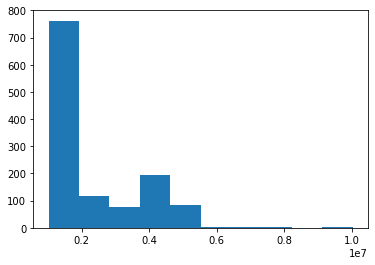

In [221]:
plt.hist(corn[2])